# Python Lambda Functions

## Introduction

Lambda functions in Python are anonymous functions (functions without a name) defined using the `lambda` keyword. They are often used for small, throwaway functions that don’t require a full function definition.

## Syntax

```python
lambda arguments: expression
```

In [19]:
def g(x):
    return x + 5


f = lambda x: x + 5

print('def:', f(1))
print('lambda:', g(1))

def: 6
lambda: 6


In [20]:
(lambda x: x + 5)(1)

6

## Explanation: Environment Capturing in Lambda Functions

In Python, **lambda functions** can capture variables from their surrounding environment (also known as a **closure**). This allows the lambda function to use variables that are not passed as arguments but are defined in the same scope where the lambda is created.

In [21]:
num = 7
f = lambda x: x * num
print(f(2))

14


In [22]:
vowel = "aoiue"
is_vowel = lambda x: x.lower() in vowel

print(is_vowel('a'))
print(is_vowel('g'))
print(is_vowel('m'))
print(is_vowel('I'))

True
False
False
True


## MapReduce Approach and Functional Programming Principles

We know from chapter 2 in DA460 that **MapReduce** approach, widely used for processing and generating large datasets, is based on functional programming principles. It is implemented in programming languages like: Haskell, Rust, and Python. The core of the MapReduce approach is built upon three fundamental principles:

### 1. **Immutability**

In functional programming, data structures are immutable, meaning they cannot be changed after creation. In the MapReduce model, immutability ensures that once data is processed, it remains unchanged. This makes the computation predictable and easier to debug, as no side effects occur during the data transformation process.

### 2. **Higher-Order Functions**

Higher-order functions are functions that can take other functions as arguments or return functions as results. In the MapReduce approach:
- The **Map** function applies a transformation (function) to each element of the input data.
- The **Reduce** function aggregates the results of the map operation using another function.

Both **Map** and **Reduce** are higher-order functions because they take functions as input, allowing for dynamic and reusable behavior in data processing.

### 3. **Lazy Evaluation**

Lazy evaluation is a technique where expressions are not evaluated until their values are actually needed. In the context of MapReduce:
- The **Map** step can process data lazily, meaning the transformation happens only when required.
- The **Reduce** step can aggregate results incrementally without fully evaluating intermediate results.

Lazy evaluation optimizes performance by avoiding unnecessary computations, especially when dealing with large datasets, and it ensures that only the required portions of data are processed.

---

### Summary

The MapReduce approach in functional programming languages like Haskell, Rust, and Python leverages three core principles: immutability, higher-order functions, and lazy evaluation. These principles enable scalable, modular, and efficient data processing in distributed systems.


### Examples of Higher-Order Functions

1. **`map()`**  
   Applies a function to each item in an iterable and returns new iterable with the results.

2. **`filter()`**  
   Filters elements in an iterable based on a predicate function and returns only the elements that satisfy the condition.

3. **`reduce()`**  
   Cumulatively applies a function to the items of an iterable, reducing it to a single value.

4. **`sorted()`**  
   Sorts items in an iterable using a custom sorting function passed as the `key` argument.

5. **Custom Functions**
   that accept other functions as arguments to apply custom operations.

![Map/Filter/Reduce](images/mfr.png) 

In [23]:
numbers = [1, 2, 3, 4]
squares = map(lambda x: x**2, numbers) # lazy evaluation
print('map without trigger:', squares)
squares = list(squares) # list triggers the execution
print('map with trigger:', squares)

map without trigger: <map object at 0x000001587C163D00>
map with trigger: [1, 4, 9, 16]


In [24]:
numbers = [1, 2, 3, 4]
squares = list(map(lambda x: x**2, numbers))
print(squares) 

[1, 4, 9, 16]


In [25]:
numbers = [1, 2, 3, 4, 5, -6]
max_value = max(numbers, key=lambda x: abs(x))
print(max_value)

-6


In [26]:
numbers = [1, 2, 3, 4, 5, -6, 7, 8, 9]
odd_numbers = list(filter(lambda x: x % 2 != 0, numbers))
print(odd_numbers)

[1, 3, 5, 7, 9]


In [27]:
list1 = [1, 2, 3]
list2 = [4, 5, 6]
summed_pairs = list(map(lambda x: x[0] + x[1], zip(list1, list2)))
print(summed_pairs)

[5, 7, 9]


In [28]:
from functools import reduce

numbers = [1, 2, 3, 4, 5, -6, 7, 8, 9]
print(reduce(lambda x, y: x + y, numbers)) # reduce start with the default value of the type inside the list

33


In [29]:
# default values
print(int())
print(float())

0
0.0


In [30]:
words = ["Mohammad", "Fadi", "Al-Hennawi"]
sorted_words = sorted(words)
sorted_words_by_key = sorted(words, key=lambda word: len(word))
print(sorted_words)
print(sorted_words_by_key)

['Al-Hennawi', 'Fadi', 'Mohammad']
['Fadi', 'Mohammad', 'Al-Hennawi']


## Real World Example: Nearest hospital in a GPS App

In a GPS app, we often need to find the nearest point to the user, who is located at any point (4, -2) for e.g. This can be done by calculating the distance between the user's location and various points of interest (POIs) using a mathematical formula such as the Euclidean distance.

$$
\text{Euclidean Distance} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
$$

In [31]:
hospitals_locations = [
    (0, -18),
    (5, 9),
    (7, 10),
    (-8, 11),
    (9, -12),
    (10, 13),
    (-11, 14),
    (12, 15),
]
user_location = 4, -2

In [32]:
from math import sqrt

distances = map(
        lambda point: sqrt((point[0] - user_location[0]) ** 2 + (point[1] - user_location[1]) ** 2),
        hospitals_locations
)

nearest_hospitals = min(enumerate(distances, start=0), key=lambda x: x[1]) 

print('nearst hospitals:', nearest_hospitals[0])
print('distance:', nearest_hospitals[1])

nearst hospitals: 1
distance: 11.045361017187261


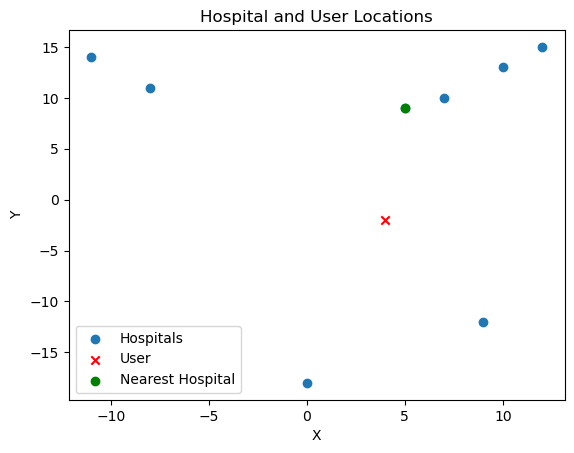

In [33]:
import matplotlib.pyplot as plt

plt.scatter(*zip(*hospitals_locations), label='Hospitals')
plt.scatter(*user_location, label='User', color='red', marker='x')
plt.scatter(*hospitals_locations[nearest_hospitals[0]], label='Nearest Hospital', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hospital and User Locations')
plt.legend()
plt.show()